In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')

halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))

subh_name = subh[:,0][halo_mask]
subh_ind  = np.int_(subh_name)
# nsubh = len(subh_name)

print(subh_ind)


[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]


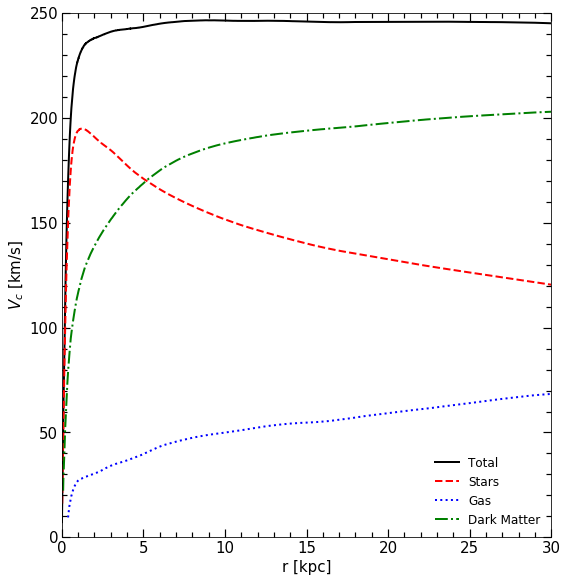

/z/omarioni/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:119: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


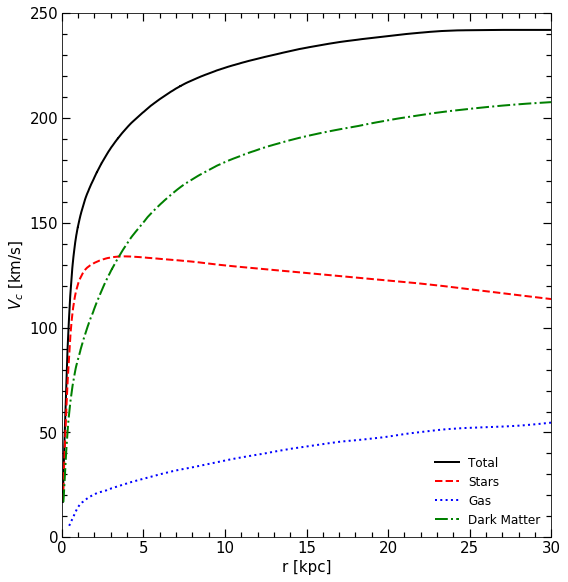

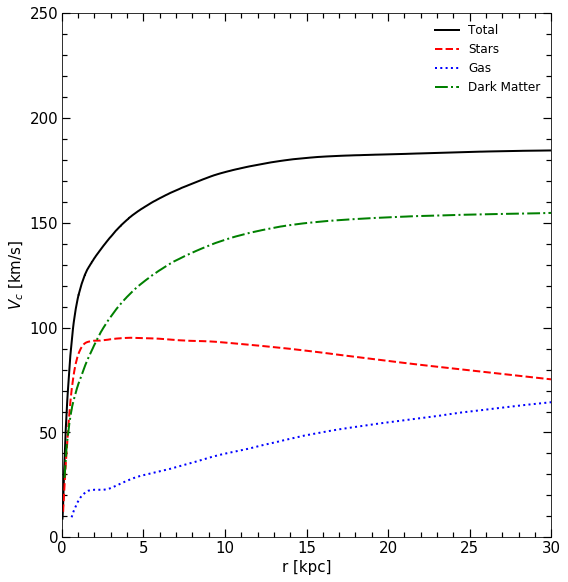

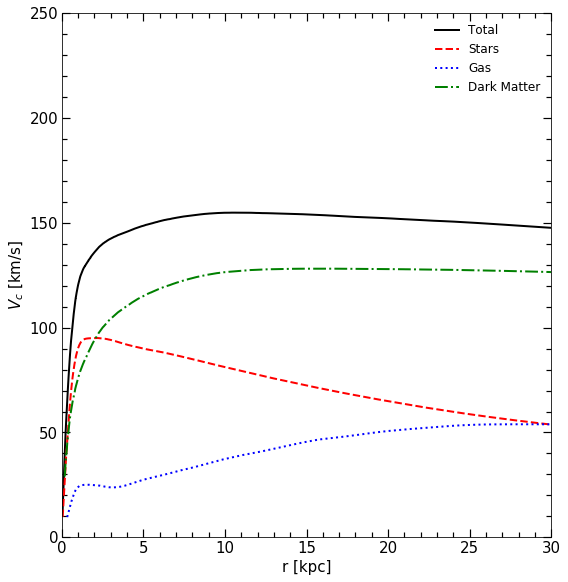

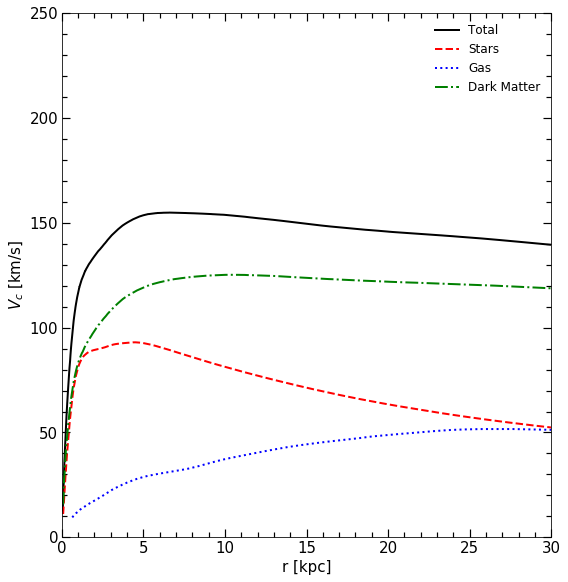

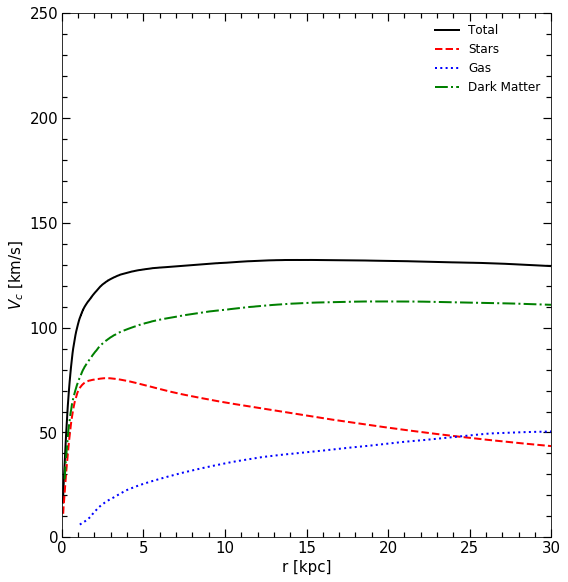

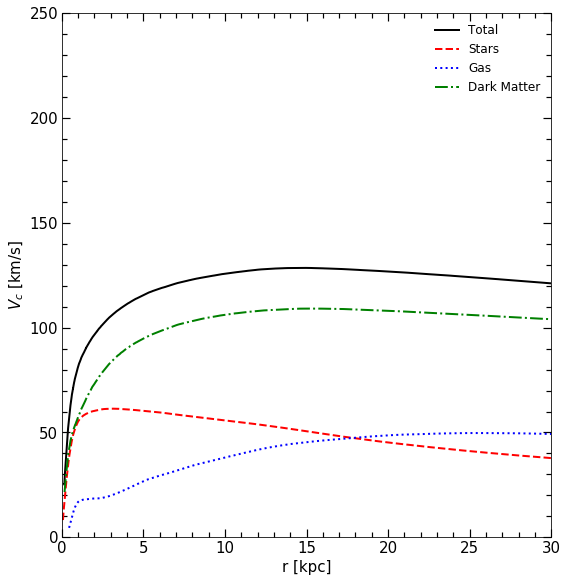

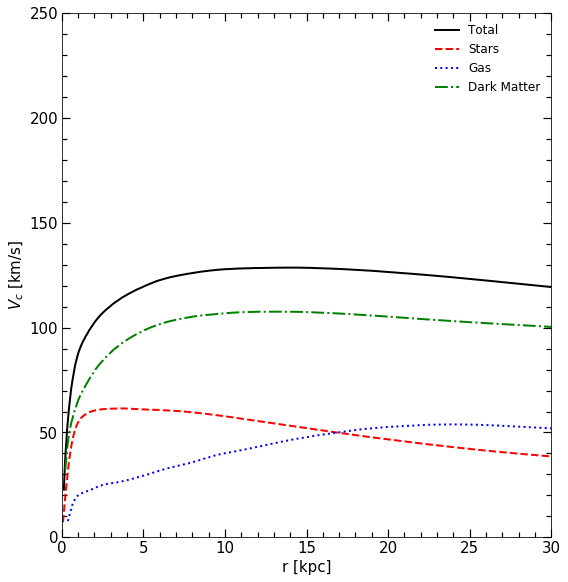

In [46]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import gc

G = 4.299e-6

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in subh_ind[:8]:

    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    R50  = snap['/SubHalfmassRad'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    pgas = snap['/Gas/Coordinates'][()]
    mgas = snap['/Gas/Masses'][()]

    pdrk = snap['/Drk/Coordinates'][()]
    mdrk = snap['/Drk/Masses'][()]


    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]*aexp/h
    ystr = pstr[:,1]*aexp/h
    zstr = pstr[:,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = pgas[:,0]*aexp/h
    ygas = pgas[:,1]*aexp/h
    zgas = pgas[:,2]*aexp/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = pdrk[:,0]*aexp/h
    ydrk = pdrk[:,1]*aexp/h
    zdrk = pdrk[:,2]*aexp/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    #----------------------masas----------------------------
    mstr = mstr/h
    mgas = mgas/h
    mdrk = mdrk/h
    
    r50 = R50*1000*aexp/h

    limit_str   = np.where(rstr<2*r50)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<2*r50)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<2*r50)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])
    

    Mc_str = cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])

#--------------------------------------------------------------       
    rtot = concatenate([rstr, rgas, rdrk])
    mtot = concatenate([mstr, mgas, mdrk])

    limit_tot   = np.where(rtot<2*r50)
    rtot_sort   = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])

    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])

    #print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
#--------------------------------------------------------------

    Vtot = np.sqrt((G*Mc_tot*1e10)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str*1e10)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas*1e10)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk*1e10)/rdrk_sort)
    
    atot = np.sort(random.choices(np.arange(len(rtot_sort)),k=np.int(len(rtot_sort)*0.01))) 
    adrk = np.sort(random.choices(np.arange(len(rdrk_sort)),k=np.int(len(rdrk_sort)*0.01)))
    astr = np.sort(random.choices(np.arange(len(rstr_sort)),k=np.int(len(rstr_sort)*0.01)))
    agas = np.sort(random.choices(np.arange(len(rgas_sort)),k=np.int(len(rgas_sort)*0.01)))
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
    fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

    ax.plot(rtot_sort[atot], Vtot[atot], '-',  lw=2, color='k', label= 'Total')
    ax.plot(rstr_sort[astr], Vstr[astr], '--', lw=2, color='r', label='Stars')
    ax.plot(rgas_sort[agas], Vgas[agas], ':',  lw=2, color='b', label='Gas')
    ax.plot(rdrk_sort[adrk], Vdrk[adrk], '-.', lw=2, color='g', label='Dark Matter')
    ax.set_ylim(0,250)
    ax.set_xlim(0,30)
    ax.set_ylabel(r'$V_{c}$ [km/s]', fontsize=15)
    ax.set_xlabel('r [kpc]', fontsize=15)
    # ax[0,0].set_xticks([0,5,10,15,20,25,30])
    # ax[0,0].set_yticks([50,100,150,200])
    # ax.set_xticklabels([])
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    ax.legend(frameon=False ,fontsize=12)

    plt.show()
    
    path2 = '/z/omarioni/gradients/_imagenes/'
    fig.savefig(path2 + 'Vcirc_subh_'+str('%03d'%j)+'.png', dpi = 100, xxbox_inches='tight')

    gc.collect()
#----------------------------------------------------------------------------------
#     data_tot = np.zeros([np.size(rtot_sort),3])
#     data_tot[:,0]= rtot_sort
#     data_tot[:,1]= Vtot
#     data_tot[:,2]= Mc_tot*1e10

#     data_str = np.zeros([np.size(rstr_sort),3])
#     data_str[:,0]= rstr_sort
#     data_str[:,1]= Vstr
#     data_str[:,2]= Mc_str*1e10

#     data_gas = np.zeros([np.size(rgas_sort),3])
#     data_gas[:,0]= rgas_sort
#     data_gas[:,1]= Vgas
#     data_gas[:,2]= Mc_gas*1e10

#     data_drk = np.zeros([np.size(rdrk_sort),3])
#     data_drk[:,0]= rdrk_sort
#     data_drk[:,1]= Vdrk
#     data_drk[:,2]= Mc_drk*1e10

#     np.savetxt('../_data/subh_'+str('%03d'%j)+'_Vtot.dat', data_tot)
#     np.savetxt('../_data/subh_'+str('%03d'%j)+'_Vstr.dat', data_str)
#     np.savetxt('../_data/subh_'+str('%03d'%j)+'_Vgas.dat', data_gas)
#     np.savetxt('../_data/subh_'+str('%03d'%j)+'_Vdrk.dat', data_drk)

In [ ]:
%time
import gc

SubH_000  = np.loadtxt('../_data/subh_000_Vtot.dat')
rtot_subh000 = SubH_000[:,0]
Vtot_subh000 = SubH_000[:,1]
Mtot_subh000 = SubH_000[:,2]

SubH_000  = np.loadtxt('../_data/subh_000_Vstr.dat')
rstr_subh000 = SubH_000[:,0]
Vstr_subh000 = SubH_000[:,1]
Mstr_subh000 = SubH_000[:,2]

SubH_000  = np.loadtxt('../_data/subh_000_Vgas.dat')
rgas_subh000 = SubH_000[:,0]
Vgas_subh000 = SubH_000[:,1]
Mgas_subh000 = SubH_000[:,2]

SubH_000  = np.loadtxt('../_data/subh_000_Vdrk.dat')
rdrk_subh000 = SubH_000[:,0]
Vdrk_subh000 = SubH_000[:,1]
Mdrk_subh000 = SubH_000[:,2]

gc.collect()

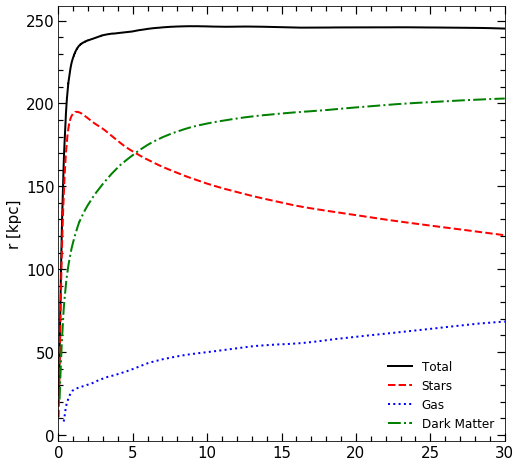

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
# fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax.plot(rtot_sort[atot], Vtot[atot], '-',  lw=2, color='k', label= 'Total')
ax.plot(rstr_sort[astr], Vstr[astr], '--', lw=2, color='r', label='Stars')
ax.plot(rgas_sort[agas], Vgas[agas], ':',  lw=2, color='b', label='Gas')
ax.plot(rdrk_sort[adrk], Vdrk[adrk], '-.', lw=2, color='g', label='Dark Matter')
# ax[0,0].set_ylim(0,15)
ax.set_xlim(0,30)
ax.set_ylabel(r'$V_{c}$ [km/s]', fontsize=15)
ax.set_xlabel('r [kpc]', fontsize=15)
# ax[0,0].set_xticks([0,5,10,15,20,25,30])
# ax[0,0].set_yticks([50,100,150,200])
# ax.set_xticklabels([])
ax.minorticks_on()
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
ax.legend(frameon=False ,fontsize=12)

plt.show()
